# STA 141B: Homework 4
Winter 2018

# E-Shen Wu 914526861

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax


## Requesting freshness

In this portion, you'll combine the assignment 3 data set with nutrition data from the [USDA Food Composition Databases](https://ndb.nal.usda.gov/ndb/search/list). The CSV file `fresh.csv` contains the fresh fruits and vegetables data you extracted in assignment 3.

The USDA Food Composition Databases have a [documented](https://ndb.nal.usda.gov/ndb/doc/index) web API that returns data in JSON format . You need a key in order to use the API. Only 1000 requests are allowed per hour, so it would be a good idea to use [caching][requests_cache].

[Sign up for an API key here](https://api.data.gov/signup/). The key will work with any Data.gov API. You may need the key again later in the quarter, so make sure you save it.

These modules may be useful:

* [requests](http://docs.python-requests.org/en/master/user/quickstart/)
* [requests_cache][]
* [urlparse](https://docs.python.org/2/library/urlparse.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/)

[requests_cache]: https://pypi.python.org/pypi/requests-cache

__Exercise 1.1__ (20 pts)

Read the [search request documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-SEARCH.md), then write a function called `ndb_search()` that makes a search request. The function should accept the search term as an argument. The function should return the search result items as a list (for 0 items, return an empty list).

Note that the search url is: `https://api.nal.usda.gov/ndb/search`

As an example, a search for `"quail eggs"` should return this list:

```python
[{u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  u'ndbno': u'45094707',
  u'offset': 0},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
  u'ndbno': u'45094890',
  u'offset': 1},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  u'ndbno': u'45099560',
  u'offset': 2},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  u'ndbno': u'45169279',
  u'offset': 3},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  u'ndbno': u'45178254',
  u'offset': 4},
 {u'ds': u'SR',
  u'group': u'Dairy and Egg Products',
  u'name': u'Egg, quail, whole, fresh, raw',
  u'ndbno': u'01140',
  u'offset': 5}]
```

As usual, make sure you document and test your function.

In [1]:
import requests
import requests_cache
import pandas as pd
  
def ndb_search(word):
    usda_url = "https://api.nal.usda.gov/ndb/search"
    parameters = {'api_key':"19Wj12HnWzdsjCYgCj2T249nBEfQEn09DYj82Jd7",'q':word,'format':'json'}
    req = requests.get(usda_url,params = parameters)
    js = req.json()
    return js['list']['item']    
    
    
ndb_search("quail eggs")  
   
    

[{'ds': 'LI',
  'group': 'Branded Food Products Database',
  'manu': "milly's desserts llc",
  'name': 'EL COMPI, QUAIL EGGS, UPC: 854955002226',
  'ndbno': '45362205',
  'offset': 0},
 {'ds': 'LI',
  'group': 'Branded Food Products Database',
  'manu': 'Sung Ly International Corporation',
  'name': 'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  'ndbno': '45099560',
  'offset': 1},
 {'ds': 'LI',
  'group': 'Branded Food Products Database',
  'manu': 'L & M C Farms, Inc.',
  'name': 'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  'ndbno': '45169279',
  'offset': 2},
 {'ds': 'LI',
  'group': 'Branded Food Products Database',
  'manu': 'L&W International Co.',
  'name': 'L&W, QUAIL EGGS, UPC: 024072000256',
  'ndbno': '45094890',
  'offset': 3},
 {'ds': 'LI',
  'group': 'Branded Food Products Database',
  'manu': 'Theppadung Porn Coconut Co',
  'name': 'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  'ndbno': '45094707',
  'offset': 4},
 {'ds': 'SR',
  'group': 'Dairy and Egg Prod

__Exercise 1.2__ (20 pts)

Use your search function to get NDB numbers for the foods in the `fresh.csv` file. It's okay if you don't get an NDB number for every food, but try to come up with a strategy that gets most of them. Discuss your strategy in a short paragraph.

Hints:

* The foods are all raw and unbranded.
* You can test search terms with the [online search page](https://ndb.nal.usda.gov/ndb/search/list).
* You can convert the output of `ndb_search()` to a data frame with `pd.DataFrame()`.
* The string methods for [Python](https://docs.python.org/2/library/stdtypes.html#string-methods) and [Pandas](http://pandas.pydata.org/pandas-docs/stable/text.html#method-summary) are useful here. It's okay if you use _simple_ regular expressions in the Pandas methods, although this exercise can be solved without them.
* You can merge data frames that have a column in common with `pd.merge()`.

In [191]:
import pandas as pd
freshcsv = pd.read_csv("/Users/foxeshen/141b-hw4-foxeshen/fresh.csv")
foodlist=freshcsv[['food']].values.tolist()
pd.set_option('display.max_rows', 500)
all_data = pd.DataFrame()

for i in range(len(foodlist)):
    ndb_search(foodlist[i])
    datafame1=pd.DataFrame(data=ndb_search(foodlist[i]))
    df=datafame1[datafame1['ds']=='SR']
    df=df[df['name'].str.contains(", raw")] 
    df=df.iloc[0:1,:]
    df['food']=foodlist[i]
    all_data = all_data.append(df,ignore_index=True)   

all_data
all_data1 = all_data[['food', 'ndbno']]
all_data1

numberwithfood=pd.merge(freshcsv, all_data1, on='food')
numberwithfood
#12 34 35 36 37 43 45 50

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,ndbno
0,Fresh1,0.333412,0.520000,0.330693,0.212033,watermelon,fruit,09326
1,Fresh1,0.535874,0.510000,0.374786,0.393800,cantaloupe,fruit,09181
2,Fresh1,1.377962,0.740000,0.407855,0.759471,tangerines,fruit,09218
3,Fresh1,2.358808,0.940000,0.319670,0.802171,strawberries,fruit,09316
4,Fresh1,1.827416,0.940000,0.363763,0.707176,plums,fruit,09279
5,Fresh1,1.035173,0.730000,0.407855,0.578357,oranges,fruit,09201
6,Fresh1,6.975811,0.960000,0.319670,2.322874,raspberries,fruit,09302
7,Fresh1,2.173590,0.560000,0.341717,1.326342,pomegranate,fruit,09286
8,Fresh1,0.627662,0.510000,0.363763,0.447686,pineapple,fruit,09266
9,Fresh1,3.040072,0.930000,0.363763,1.189102,apricots,fruit,09021


First, we load the fresh.csv to get the list of food. Then, use for loop to run function ndb_search(), and we will get
a dataframe of search result. The hint indicates that the column 'ds' should be equal 'ds' and the name should contain
the word 'raw'. Filter the dataframe and append all results. We will get what we want.



__Exercise 1.3__ (20 pts)

Read the [food reports V2 documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md), then write a function called `ndb_report()` that requests a _basic_ food report. The function should accept the NDB number as an argument and return the list of nutrients for the food.

Note that the report url is: `https://api.nal.usda.gov/ndb/V2/reports`

For example, for `"09279"` (raw plums) the first element of the returned list should be:

```python
{u'group': u'Proximates',
 u'measures': [{u'eqv': 165.0,
   u'eunit': u'g',
   u'label': u'cup, sliced',
   u'qty': 1.0,
   u'value': u'143.93'},
  {u'eqv': 66.0,
   u'eunit': u'g',
   u'label': u'fruit (2-1/8" dia)',
   u'qty': 1.0,
   u'value': u'57.57'},
  {u'eqv': 151.0,
   u'eunit': u'g',
   u'label': u'NLEA serving',
   u'qty': 1.0,
   u'value': u'131.72'}],
 u'name': u'Water',
 u'nutrient_id': u'255',
 u'unit': u'g',
 u'value': u'87.23'}
```

Be sure to document and test your function.

In [195]:
import requests
import requests_cache
import pandas as pd
  
def ndb_report(NDB):
    usda_url = "https://api.nal.usda.gov/ndb/V2/reports"
    parameters = {'api_key':"19Wj12HnWzdsjCYgCj2T249nBEfQEn09DYj82Jd7",'ndbno':NDB,'format':'json'}
    req = requests.get(usda_url,params = parameters)
    js = req.json()
    return js['foods'][0]['food']['nutrients']




ndb_report('09279')


#['foods'][0]['food']['nutrients']

#ndb_report("09279")[1]['measures'][0]['value']
#list
#int(ndb_report("09279")[1]['measures'][0]['value'])

[{'derivation': 'NONE',
  'group': 'Proximates',
  'measures': [{'eqv': 165.0,
    'eunit': 'g',
    'label': 'cup, sliced',
    'qty': 1.0,
    'value': '143.93'},
   {'eqv': 66.0,
    'eunit': 'g',
    'label': 'fruit (2-1/8" dia)',
    'qty': 1.0,
    'value': '57.57'},
   {'eqv': 151.0,
    'eunit': 'g',
    'label': 'NLEA serving',
    'qty': 1.0,
    'value': '131.72'}],
  'name': 'Water',
  'nutrient_id': '255',
  'unit': 'g',
  'value': '87.23'},
 {'derivation': 'NC',
  'group': 'Proximates',
  'measures': [{'eqv': 165.0,
    'eunit': 'g',
    'label': 'cup, sliced',
    'qty': 1.0,
    'value': '76'},
   {'eqv': 66.0,
    'eunit': 'g',
    'label': 'fruit (2-1/8" dia)',
    'qty': 1.0,
    'value': '30'},
   {'eqv': 151.0,
    'eunit': 'g',
    'label': 'NLEA serving',
    'qty': 1.0,
    'value': '69'}],
  'name': 'Energy',
  'nutrient_id': '208',
  'unit': 'kcal',
  'value': '46'},
 {'derivation': 'NONE',
  'group': 'Proximates',
  'measures': [{'eqv': 165.0,
    'eunit': 'g

__Exercise 1.4__ (20 pts) Which foods provide the best combination of price, yield, and nutrition? You can use kilocalories as a measure of "nutrition" here, but more a detailed analysis is better. Use plots to support your analysis.

In [228]:
numberwithfood
newdata=numberwithfood.copy()
newdata=newdata.drop(newdata.index[[12,34,35,36,37,43,45,50]])
number=newdata['ndbno'].values.tolist()
mylist=[]
for i in range(len(number)):
    ndb_report(number[i])[1]['measures'][0]['value']
    mylist.append(ndb_report(number[i])[1]['measures'][0]['value'])
se = pd.Series(mylist)  
newdata['kcal'] = se.values
mylist1=[]
for i in range(len(number)):
    ndb_report(number[i])[5]['measures'][0]['value']
    mylist1.append(ndb_report(number[i])[5]['measures'][0]['value'])
se1 = pd.Series(mylist1)  
newdata['Fiber'] = se1.values
newdata['kcal'] = newdata['kcal'].astype(float)
newdata['Fiber'] = newdata['Fiber'].astype(float)
newdata['price_per_kcal']=newdata['price_per_cup']/newdata['kcal']
newdata['price_per_Fiber']=newdata['price_per_cup']/newdata['Fiber']
newdata

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,ndbno,kcal,Fiber,price_per_kcal,price_per_Fiber
0,Fresh1,0.333412,0.520000,0.330693,0.212033,watermelon,fruit,09326,46.0,0.6,0.004609,0.353388
1,Fresh1,0.535874,0.510000,0.374786,0.393800,cantaloupe,fruit,09181,60.0,1.6,0.006563,0.246125
2,Fresh1,1.377962,0.740000,0.407855,0.759471,tangerines,fruit,09218,103.0,3.5,0.007374,0.216992
3,Fresh1,2.358808,0.940000,0.319670,0.802171,strawberries,fruit,09316,49.0,3.0,0.016371,0.267390
4,Fresh1,1.827416,0.940000,0.363763,0.707176,plums,fruit,09279,76.0,2.3,0.009305,0.307468
5,Fresh1,1.035173,0.730000,0.407855,0.578357,oranges,fruit,09201,88.0,4.5,0.006572,0.128524
6,Fresh1,6.975811,0.960000,0.319670,2.322874,raspberries,fruit,09302,64.0,8.0,0.036295,0.290359
7,Fresh1,2.173590,0.560000,0.341717,1.326342,pomegranate,fruit,09286,72.0,3.5,0.018421,0.378955
8,Fresh1,0.627662,0.510000,0.363763,0.447686,pineapple,fruit,09266,82.0,2.3,0.005460,0.194646
9,Fresh1,3.040072,0.930000,0.363763,1.189102,apricots,fruit,09021,74.0,3.1,0.016069,0.383581


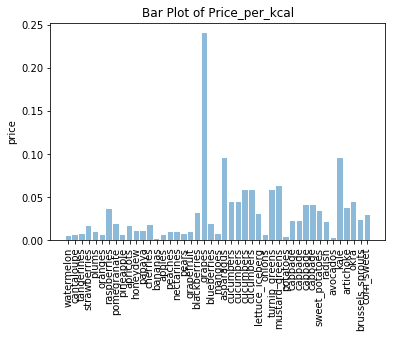

In [231]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotnine as gg
objects =newdata['food']
y_pos = np.arange(len(objects))
performance = newdata['price_per_kcal'] 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('price')
plt.title('Bar Plot of Price_per_kcal')
plt.xticks(rotation=90)
plt.show()
#price_per_cup divide by kcal(cal per cup), we get price_per_kcal. 
#The lower price_per_kcal the less money we spent on kcal. So we should choose the lowest one.
#It is bananas.

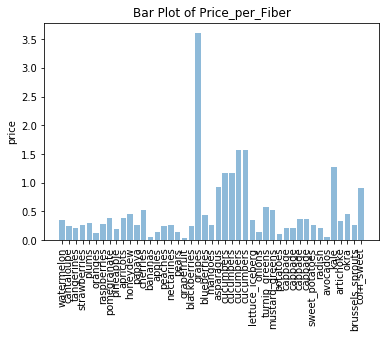

In [233]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotnine as gg
objects =newdata['food']
y_pos = np.arange(len(objects))
performance = newdata['price_per_Fiber'] 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('price')
plt.title('Bar Plot of Price_per_Fiber')
plt.xticks(rotation=90)
plt.show()
#Same reason in Fiber.
#What we want is grapefruit.